<a href="https://colab.research.google.com/github/bessszilard/Udacity-Self-Driving-Car-Engineer-Nanodegree-Program/blob/master/Project-4-Behavioral-Cloning/Behavioral_cloning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bessszilard/Self-Driving-Car-Simulator-Data

fatal: destination path 'Self-Driving-Car-Simulator-Data' already exists and is not an empty directory.


In [2]:
!ls
!ls Self-Driving-Car-Simulator-Data

model.h5  sample_data  Self-Driving-Car-Simulator-Data
driving_log.csv  IMG  LICENSE  README.md


In [3]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPool2D, Dropout, Flatten, Dense, Lambda
from keras.layers import Cropping2D, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
from google.colab import files

Using TensorFlow backend.


In [0]:
# lines = []
# with open("../data/driving_log.csv") as csvfile:
#     reader = csv.reader(csvfile)
#     for line in reader:
#         lines.appedn

In [0]:
# datadir = 'Self-Driving-Car-Simulator-Data'
# colums = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
# data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = colums)
# pd.set_option('display.max_colwidth', -1)
# data.head()

lines = []
with open('Self-Driving-Car-Simulator-Data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []

def path_to_image(dir, line):
    filename = source_path.split('\\')[-1] 
    current_path = dir + filename
    return cv2.imread(current_path)

for line in lines:
    steering_center = float(line[3])
    
#     # create adjusted steering measurements for the side camera images
#     correction = 1 # this is a parameter to tune
#     steering_left = 1.5*steering_center + correction
#     steering_right = 1.5*steering_center - correction
            
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = 'Self-Driving-Car-Simulator-Data/IMG/' + filename
    
    image = cv2.imread(current_path)
    
    dir = 'Self-Driving-Car-Simulator-Data/IMG/'
    image_center = path_to_image(dir, line[0])
#     image_left   = path_to_image(dir, line[1])
#     image_right  = path_to_image(dir, line[2])
    
    images.append(image_center)
    measurement = float(line[3])
    measurements.append(measurement)
#     images.extend((image_center, image_left, image_right))
#     measurements.extend((steering_center, steering_left, steering_right))

# augmented_images = images
# augemented_measurements = measurements
# del images, measurements

augmented_images, augemented_measurements = [], []  
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augemented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augemented_measurements.append(-measurement)




0.0


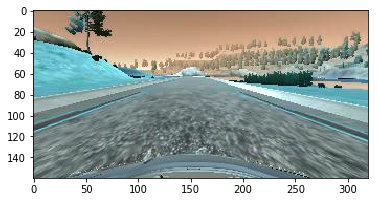

In [6]:
index = random.randint(0, len(measurements)-1)
plt.imshow(images[index])
print(measurements[index])

In [0]:
#clear RAM

X_train = np.array(augmented_images)
y_train = np.array(augemented_measurements)
del augmented_images, augemented_measurements
del lines, images, measurements

In [16]:
model = Sequential()
model.add(Lambda(lambda x: ((x / 255.0) - 0.5), input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 25),(0, 0))))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))

optimizer = Adam(lr = 0.5e-3)
model.compile(loss='mse', optimizer=optimizer)
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=7)

Train on 16334 samples, validate on 4084 samples
Epoch 1/7
16334/16334 [==============================] - 13s 795us/step - loss: 0.0305 - val_loss: 0.0312
Epoch 2/7
16334/16334 [==============================] - 11s 697us/step - loss: 0.0231 - val_loss: 0.0294
Epoch 3/7
16334/16334 [==============================] - 11s 694us/step - loss: 0.0207 - val_loss: 0.0287
Epoch 4/7
16334/16334 [==============================] - 11s 697us/step - loss: 0.0197 - val_loss: 0.0277
Epoch 5/7
16334/16334 [==============================] - 11s 694us/step - loss: 0.0183 - val_loss: 0.0277
Epoch 6/7
16334/16334 [==============================] - 11s 694us/step - loss: 0.0175 - val_loss: 0.0272
Epoch 7/7
16334/16334 [==============================] - 11s 700us/step - loss: 0.0167 - val_loss: 0.0278


dict_keys(['val_loss', 'loss'])


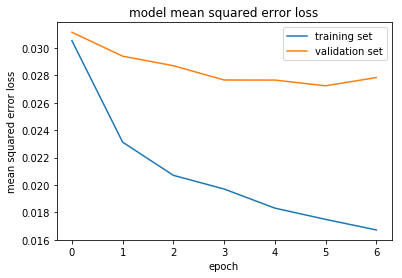

In [17]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [0]:
model.save('model.h5')
# !ls
files.download('model.h5')